<a href="https://colab.research.google.com/github/12010208idanuraenitpc-dot/DataAnalyst/blob/main/Project1-ML-IdaNuraeni/UAS_Analisis_Data_perminyakan_ida_nuraeni_27259069.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving facies_data2.csv to facies_data2 (1).csv
User uploaded file "facies_data2 (1).csv" with length 196104 bytes


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('facies_data2.csv')
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [7]:
data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


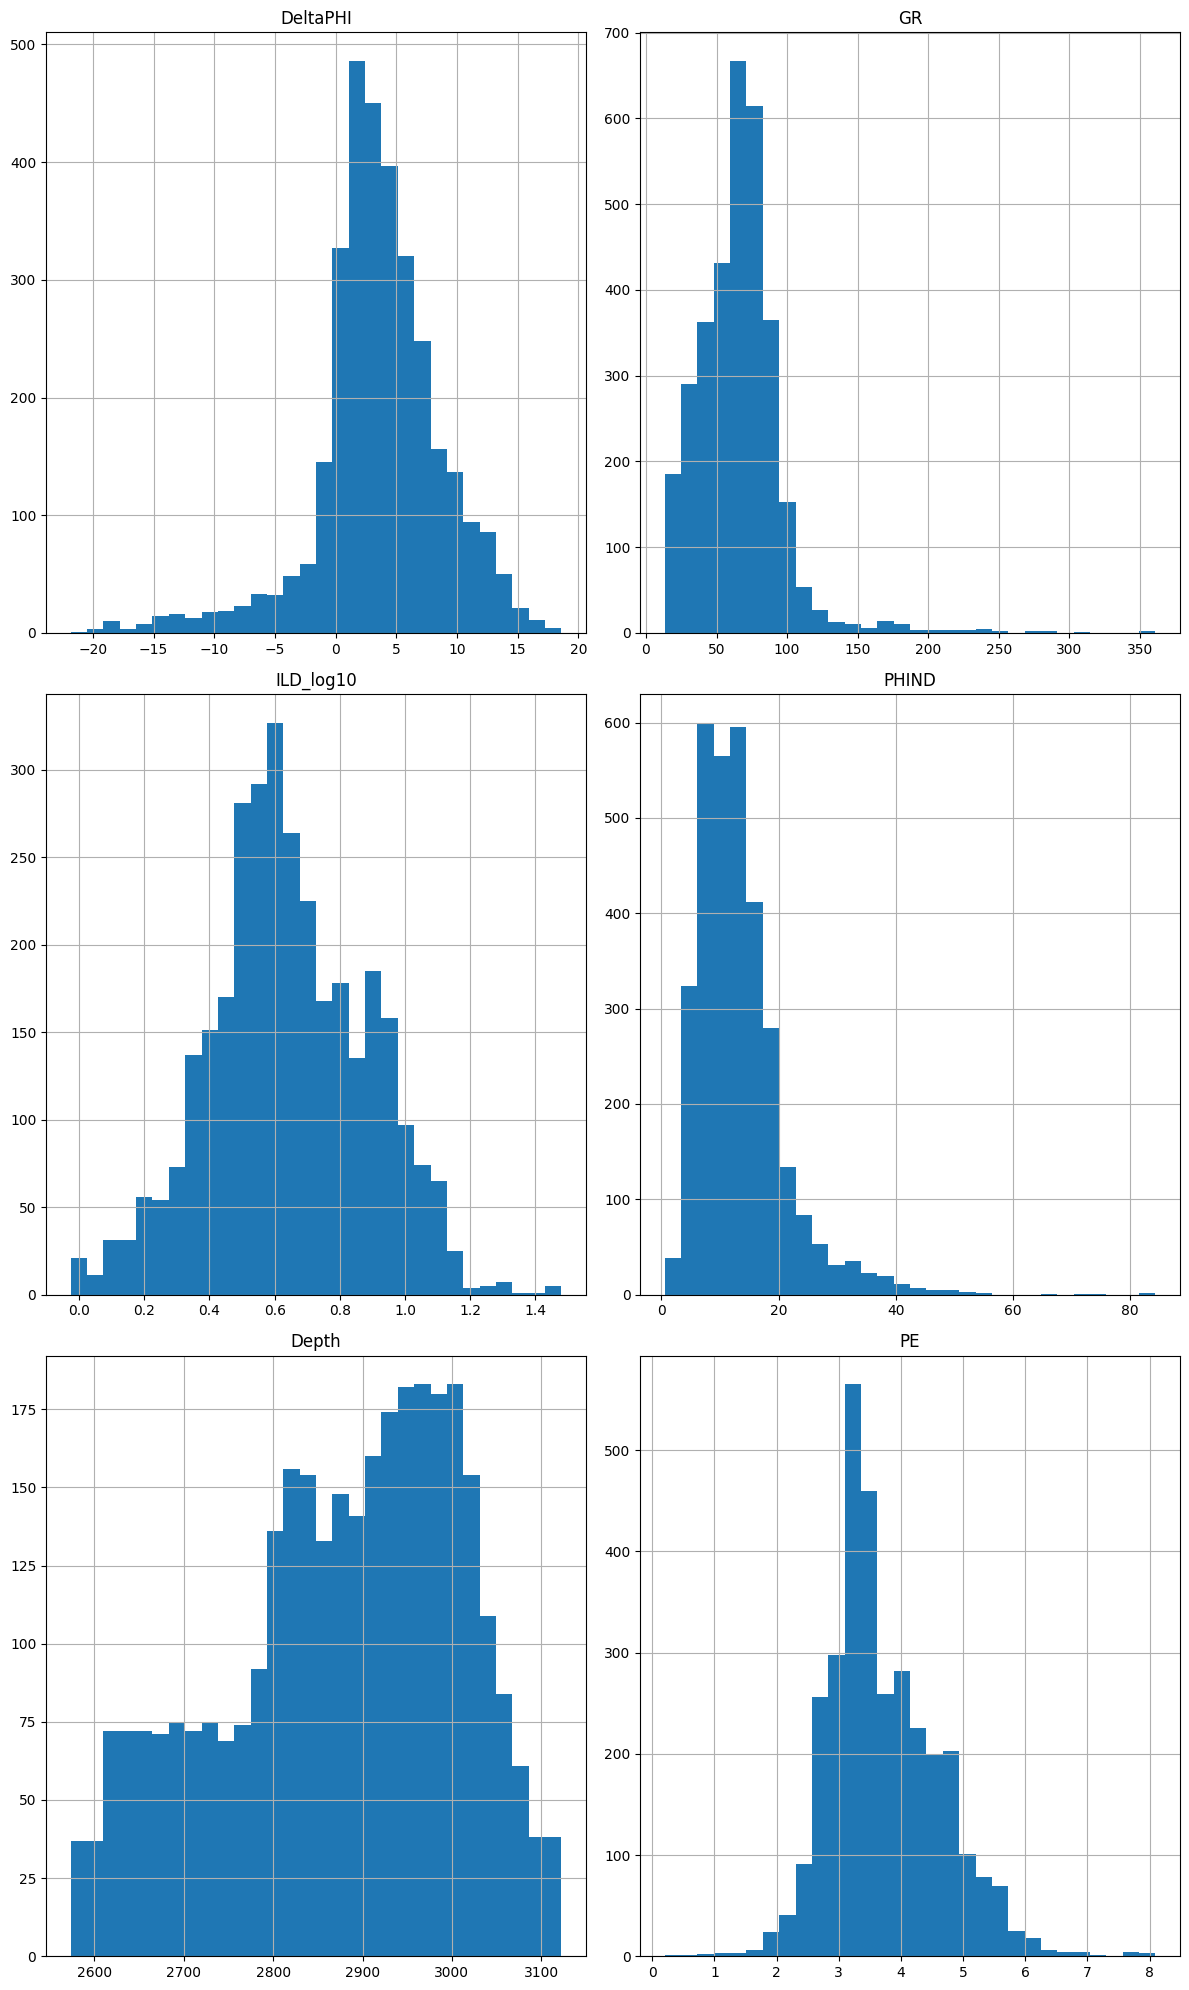

In [8]:
stat = data[['DeltaPHI','GR','ILD_log10','PHIND','Depth','PE']]
stat.hist (figsize=(12,20),bins=30)
plt.tight_layout()
plt.show()

<Axes: >

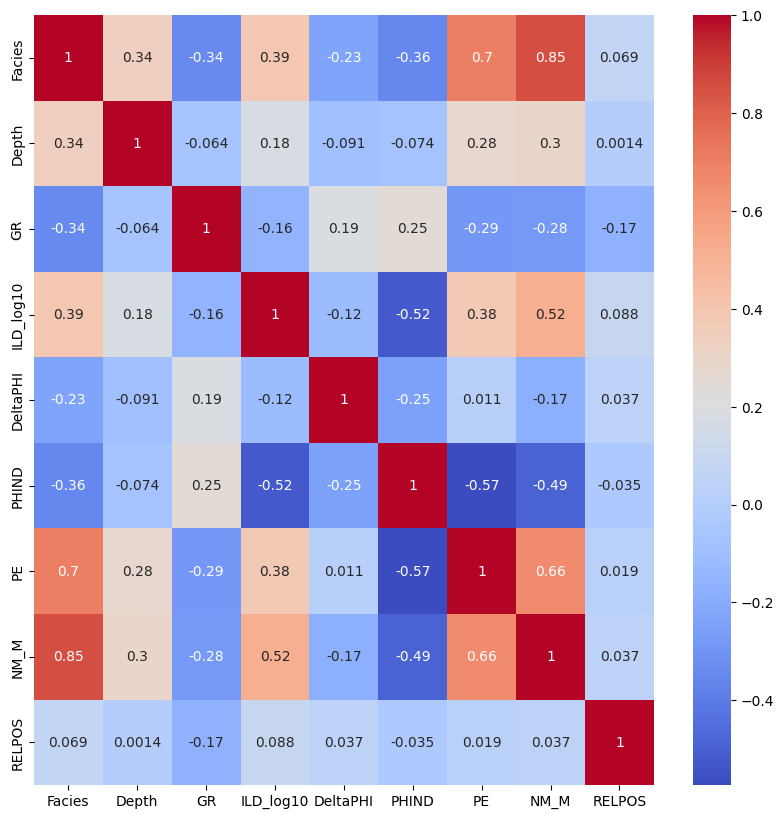

In [9]:
data2 = data.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(data2, cmap='coolwarm', annot=True)

In [10]:
data = data.sort_values("Depth").reset_index(drop=True)

depth = data["Depth"]
GR = data["GR"]
ILD_log10 = data["ILD_log10"]
DeltaPHI = data["DeltaPHI"]
PHIND = data["PHIND"]
PE = data["PE"]

Text(0, 0.5, 'Depth')

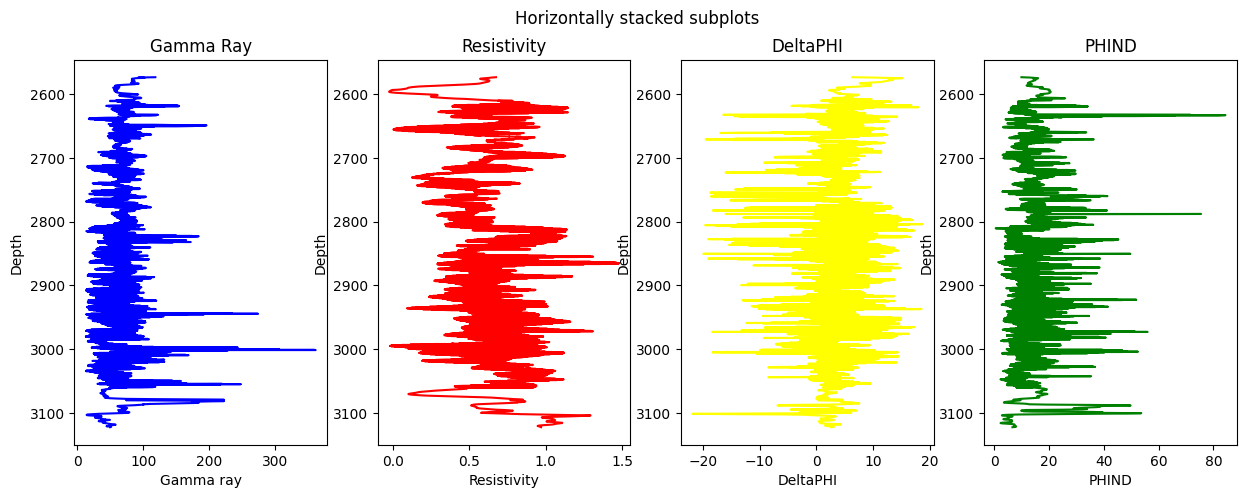

In [11]:
#Plot Log vs kedalaman
fig, (ax1, ax2, ax3, ax4)= plt.subplots(1, 4, figsize=(15,5))
fig.suptitle('Horizontally stacked subplots')

ax1.plot(GR, depth, color='blue')
ax1.invert_yaxis()
ax1.set_title('Gamma Ray')
ax1.set_xlabel('Gamma ray')
ax1.set_ylabel('Depth')

ax2.plot(ILD_log10, depth, color='red')
ax2.invert_yaxis()
ax2.set_title('Resistivity')
ax2.set_xlabel('Resistivity')
ax2.set_ylabel('Depth')

ax3.plot(DeltaPHI, depth, color='yellow')
ax3.invert_yaxis()
ax3.set_title('DeltaPHI')
ax3.set_xlabel('DeltaPHI')
ax3.set_ylabel('Depth')

ax4.plot(PHIND, depth, color='Green')
ax4.invert_yaxis()
ax4.set_title('PHIND')
ax4.set_xlabel('PHIND')
ax4.set_ylabel('Depth')

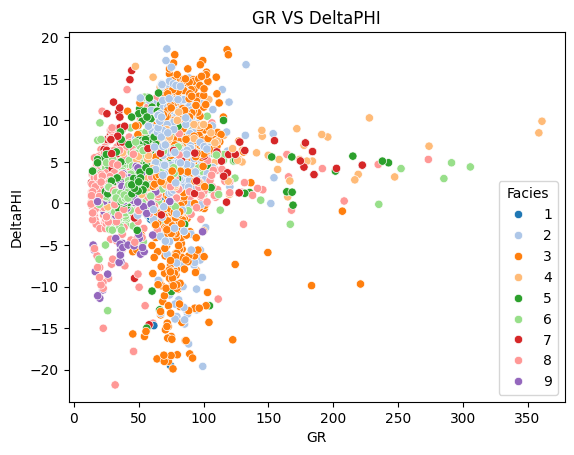

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,2,A1 SH,CROSS H CATTLE,2573.5,118.439,0.674494,6.3,9.95,3.631,1,1.000
1,2,A1 SH,CROSS H CATTLE,2574.0,92.550,0.645226,9.9,13.05,3.450,1,0.987
2,2,A1 SH,CROSS H CATTLE,2574.5,102.168,0.630021,12.0,14.50,3.364,1,0.974
3,2,A1 SH,CROSS H CATTLE,2575.0,88.898,0.600319,15.1,16.05,3.187,1,0.961
4,2,A1 SH,CROSS H CATTLE,2575.5,85.493,0.578639,13.6,15.90,3.099,1,0.947


In [12]:
#Plot GR VS DeltaPHI
sns.scatterplot(data=data, x=GR, y=DeltaPHI, palette='tab20', hue='Facies')
plt.title('GR VS DeltaPHI')
plt.show ()

data.head()

In [13]:
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,2,A1 SH,CROSS H CATTLE,2573.5,118.439,0.674494,6.3,9.95,3.631,1,1.000
1,2,A1 SH,CROSS H CATTLE,2574.0,92.550,0.645226,9.9,13.05,3.450,1,0.987
2,2,A1 SH,CROSS H CATTLE,2574.5,102.168,0.630021,12.0,14.50,3.364,1,0.974
3,2,A1 SH,CROSS H CATTLE,2575.0,88.898,0.600319,15.1,16.05,3.187,1,0.961
4,2,A1 SH,CROSS H CATTLE,2575.5,85.493,0.578639,13.6,15.90,3.099,1,0.947


**ML Model**

In [14]:
from re import X
#add Feature list for clustering
Feature = ['GR','ILD_log10','DeltaPHI','PHIND','PE']

#Filter data model
data = data [Feature + ['Depth']].dropna ()

X = data [Feature]

data.head ()



,GR,ILD_log10,DeltaPHI,PHIND,PE,Depth
0,118.439,0.674494,6.3,9.95,3.631,2573.5
1,92.550,0.645226,9.9,13.05,3.450,2574.0
2,102.168,0.630021,12.0,14.50,3.364,2574.5
3,88.898,0.600319,15.1,16.05,3.187,2575.0
4,85.493,0.578639,13.6,15.90,3.099,2575.5


In [15]:
#Preprocessing - Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)


In [16]:
#Model Training

n_rocktype = 4 #jumlah clasifikasi yg kita inginkan

#Plot ML KMeans
from sklearn.cluster import KMeans
KMeans=KMeans(n_clusters=n_rocktype, random_state=42, n_init=20)
label_KMeans = KMeans.fit_predict (X_standard)
data['Kmeans'] =label_KMeans

#Plot ML GM
from sklearn.mixture import GaussianMixture
GaussianMixture = GaussianMixture(n_components=n_rocktype,covariance_type='full', random_state=42)
label_GM = GaussianMixture.fit_predict (X_standard)
data['GM']=label_GM

#Plot ML AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
AC_model = AgglomerativeClustering(n_clusters=n_rocktype, linkage="ward")
label_AC = AC_model.fit_predict(X_standard)
data['AC'] = label_AC

data.head()

,GR,ILD_log10,DeltaPHI,PHIND,PE,Depth,Kmeans,GM,AC
0,118.439,0.674494,6.3,9.95,3.631,2573.5,1,3,1
1,92.550,0.645226,9.9,13.05,3.450,2574.0,1,1,1
2,102.168,0.630021,12.0,14.50,3.364,2574.5,1,1,1
3,88.898,0.600319,15.1,16.05,3.187,2575.0,1,1,1
4,85.493,0.578639,13.6,15.90,3.099,2575.5,1,1,1


In [17]:
#ML Evaluation
from sklearn.metrics import silhouette_score

SL_Kmeans = silhouette_score(X_standard, label_KMeans)
SL_GM = silhouette_score(X_standard, label_GM)
SL_AC = silhouette_score(X_standard, label_AC)

results = pd.DataFrame({
"Model": ["Kmeans", "GM", "AC"],
"Silhouette": [SL_Kmeans, SL_GM, SL_AC]
})
print(results)


    Model  Silhouette
0  Kmeans    0.346520
1      GM    0.277167
2      AC    0.322445


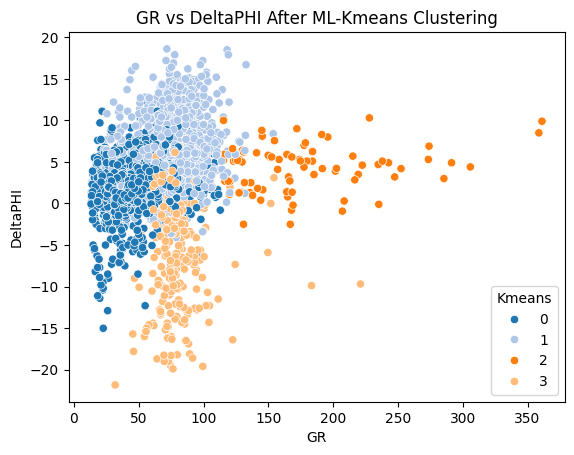

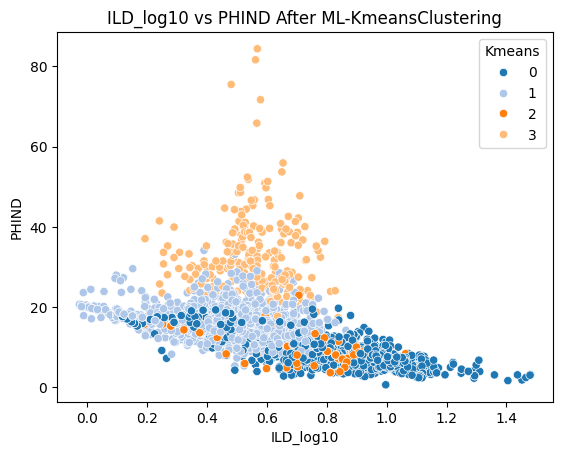

In [18]:
#crosplot GR-DeltaPHI pada ML Kmeans
sns.scatterplot(data=data, x=GR, y=DeltaPHI, palette="tab20",
                hue=data['Kmeans'])
plt.title('GR vs DeltaPHI After ML-Kmeans Clustering')
plt.show()

#crosplot ILD_log10 vs PHIND pada ML Kmeans
sns.scatterplot(data=data, x=ILD_log10, y=PHIND, palette="tab20",
                hue=data['Kmeans'])
plt.title('ILD_log10 vs PHIND After ML-KmeansClustering')
plt.show()


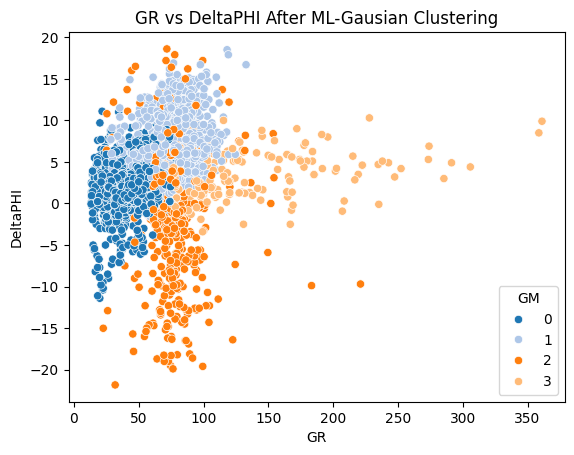

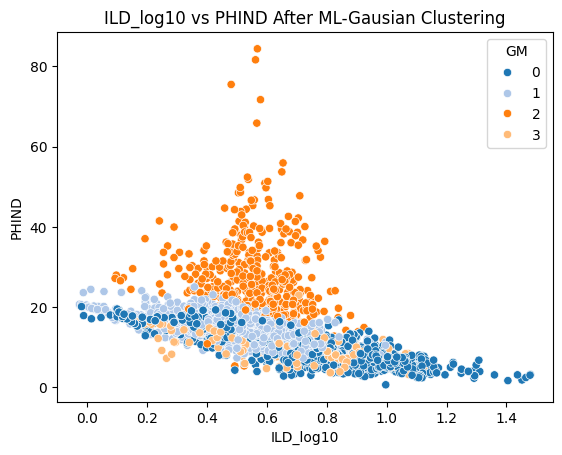

In [19]:
#crosplot GR-DeltaPHI pada ML GM
sns.scatterplot(data=data, x=GR, y=DeltaPHI, palette="tab20", hue=data['GM'])
plt.title('GR vs DeltaPHI After ML-Gausian Clustering')
plt.show()

#crosplot ILD_log10 vs PHIND pada ML GM
sns.scatterplot(data=data, x=ILD_log10, y=PHIND, palette="tab20",
                hue=data['GM'])
plt.title('ILD_log10 vs PHIND After ML-Gausian Clustering')
plt.show()


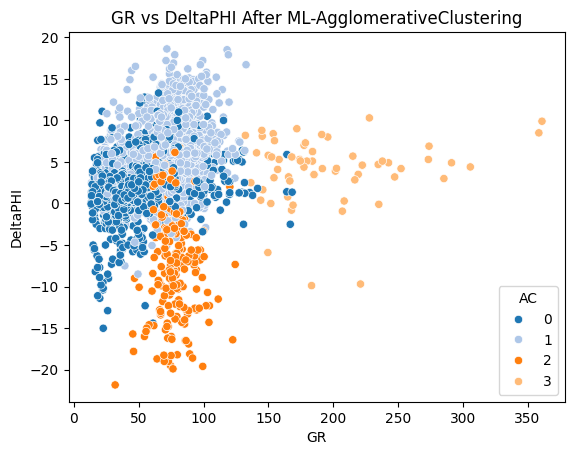

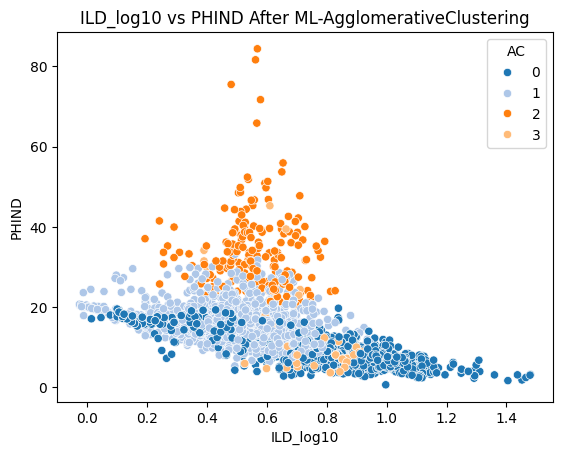

In [20]:
#crosplot GR-DeltaPHI pada ML AC
sns.scatterplot(data=data, x=GR, y=DeltaPHI, palette="tab20", hue=data['AC'])
plt.title('GR vs DeltaPHI After ML-AgglomerativeClustering')
plt.show()


#crosplot ILD_log10 vs PHIND pada ML AC
sns.scatterplot(data=data, x=ILD_log10, y=PHIND, palette="tab20",
                hue=data['AC'])
plt.title('ILD_log10 vs PHIND After ML-AgglomerativeClustering')
plt.show()

#Analisa dari ketiga ML yaitu Kmeans, GM dan AC

#1. A. Hasil Analisa ML Kmeans pada crosplot GR-DeltaPHI
#Keterangan:

- Sumbu X = GR (Gamma Ray)

Kiri → GR rendah → pasir bersih / karbonat

Kanan → GR tinggi → shale / lempung

- Sumbu Y = ΔPHI (Delta Porosity)

ΔPHI positif → indikasi gas effect (neutron < density)

ΔPHI negatif → shale effect / clay bound water

- Nilainya bukan porositas absolut, tapi indikator fluida & litologi

🔵 Cluster 0 (biru tua) : tidak ada indikasi gas kuat, Clean sand hingga slightly shaly sand, reservoir rendah

- GR rendah–menengah

- ΔPHI sekitar 0 atau sedikit negatif

🔵 Cluster 1 (biru muda): Indikasi gas effect, pasir relatif bersih, reservoir potensial

- GR rendah–menengah

- ΔPHI positif (hingga +15)

🟠 Cluster 2 (orange) : Shale radioaktif, ΔPHI positif di sini bukan gas, tapi efek mineral/lempung, Non reservoir

- GR sangat tinggi (hingga >300 API)

- ΔPHI positif kecil

🟠 Cluster 3 (orange pucat) : shaly sand, Porositas efektif rendah, non reservoir

- GR menengah (~70–120 API)

- ΔPHI sangat negatif

#Kesimpulan:
Hasil clustering K-Means pada crossplot GR-DeltaPHI menunjukkan empat kelompok utama yang merepresentasikan variasi karakter log.
A. Cluster dengan GR rendah dan DeltaPHI mendekati nol hingga positif mengindikasikan zona reservoir yang relatif bersih dan berporositas baik,
B. Cluster dengan GR tinggi didominasi oleh zona shale. Overlap antar cluster menunjukkan heterogenitas formasi dan keterbatasan metode unsupervised dalam memisahkan litologi tanpa data pembanding.”
#1. B. Hasil Analisa ML Kmeans pada crosplot ILD_log10-PHIND                 

#Keterangan :

Sumbu Y = PHIND indikator mempresentasikan porositas, Makin ke atas, makin tinggi porositas.

Sumbu X = ILD_log10 merepresentasikan tingkat resistivitas formasi, di mana nilai tinggi menunjukkan zona resistif dan nilai rendah menunjukkan zona konduktif
- Ke kanan → ILD_log10 makin besar → resistivitas makin tinggi
- Ke kiri → ILD_log10 makin kecil → resistivitas makin rendah
Secara fisika batuan:

a. Resistivitas tinggi → fluida lebih resistif (hidrokarbon atau batuan sangat kompak)

b. Resistivitas rendah → fluida konduktif (air asin) atau efek shale

🔵 Biru tua (Cluster 0) → Porositas buruk, non reservoir

- ILD_log10 tinggi

- PHIND rendah (≈ 0–10%)

🔵 Biru muda (Cluster 1) → Resistivitas rendah karena air formasi, kualitas sedang namun bukan HC
- ILD_Log10 rendah

- PHIND menengah (≈ 15–25%)

🟠 Orange gelap (Cluster 2) → transisi, overlap, Bisa shaly sand, efek clay menurunkan resistivitas

- ILD_Log10 menengah

- PHIND rendah–menengah

🟠 Orange terang (Cluster 3) → Porisitas sangat baik, resistivitas tidak tinggi, hidrokarbon ringan dengan efek conductive clay

- PHIND tinggi (hingga >40%)

- ILD_Log10 menengah


#Kesimpulan:

Hasil clustering K-means pada parameter ILD_log10 dan PHIND berhasil mengidentifikasi beberapa domain petrofisika yang merepresentasikan variasi kualitas batuan. Cluster dengan porositas tinggi dan resistivitas menengah menunjukkan potensi reservoir, sementara cluster dengan porositas rendah dan resistivitas tinggi diinterpretasikan sebagai non-reservoir.

#2. A. Hasil Analisa ML GM pada crosplot GR-DeltaPHI

#Keterangan :
- GR (X) : Rendah → pasir bersih, Tinggi → shale / lempung

- ΔPHI (Y) : Positif → indikasi gas effect (dengan syarat GR rendah), Negatif → shale effect / bound water

🔵 GM-0 (biru tua) : Clean sand tanpa indikasi gas kuat, Bisa water-bearing atau tight sand, reservoir rendah non HC

- GR rendah

- ΔPHI sekitar nol hingga sedikit negatif

🔵 GM-1 (biru muda) : Gas-prone clean sand, reservoir potensial

- GR rendah–menengah

- ΔPHI positif tinggi (hingga ~+18)

🟠 GM-2 (oranye gelap) : Shaly sand, Clay-bound water dominan, ΔPHI negatif, konsisten dengan shale effect, non reservoir

- ΔPHI sangat negatif

- GR menengah

🟠 GM-3 (oranye pucat) : Shale radioaktif, ΔPHI positif di sini bukan gas, tapi artefak mineralogi, non reservoir

- GR tinggi hingga sangat tinggi

- ΔPHI kecil hingga positif

#Kesimpulan :
"Hasil clustering Gaussian mampu memisahkan domain GR–ΔPHI secara probabilistik, sehingga zona dengan ΔPHI positif pada GR rendah dapat diidentifikasi sebagai reservoir gas potensial, sementara ΔPHI positif pada GR tinggi diinterpretasikan sebagai efek shale dan tidak diklasifikasikan sebagai reservoir”

#2. B. Hasil Analisa ML GM pada crosplot ILD_log10-PHIND

#Keterangan :

Sumbu X: ILD_log10 (resistivitas)

Sumbu Y: PHIND (porositas)

🔵 GM-0 (biru tua) : batuan limestone/shale keras non reservoir

- ILD_log10 tinggi

- PHIND sangat rendah

🔵 GM-1 (biru muda) : reservoir berpori didominasi air

- PHIND menengah (±15–25%)

- ILD_log10 rendah–menengah

🟠 GM-2 (oranye) : batuan dengan kualitas porositas terbaik, HC ringan + clay effect ini reservoir potensial

- PHIND tinggi hingga sangat tinggi (bisa >40%)

- ILD_log10 menengah

🟠 GM-3 (oranye pucat) : Transisi litologi atau efek heterogenitas

- Nilai ILD dan PHIND tumpang tindih Terletak di antara cluster lain

#Kesimpulan :
Gaussian Mixture Model mengelompokkan data ILD_log10–PHIND berdasarkan distribusi probabilistik, sehingga mampu merepresentasikan heterogenitas dan zona transisi batuan. Cluster dengan porositas tinggi dan resistivitas menengah diinterpretasikan sebagai reservoir potensial, sedangkan cluster dengan resistivitas tinggi dan porositas rendah diklasifikasikan sebagai non-reservoir.

#3. A. Hasil Analisa ML AC pada crosplot GR-DeltaPHI

#Keterangan:

- Sumbu X (GR – Gamma Ray) :Menggambarkan kandungan shale/lempung, GR rendah → batuan bersih (pasir/karbonat), GR tinggi → batuan kaya shale

- Sumbu Y (DeltaPHI) : Selisih porositas (biasanya neutron – densitas), DeltaPHI positif → kemungkinan shale atau efek gas, DeltaPHI negatif → pasir bersih, karbonat, atau efek gas tertentu

🔵 Cluster 0 (biru tua) : Pasir relatif bersih, Porositas cukup baik, Potensi reservoir (sandstone)

- GR rendah–menengah (±20–90)

- DeltaPHI sekitar -10 sampai +5

🔷 Cluster 1 (biru muda) : Shaly sand,Campuran pasir dan lempung, Porositas terpengaruh shale, reservoir kualitas menengah

- GR menengah (±40–110)

- DeltaPHI positif (0 hingga +15)

🟠 Cluster 2 (orange tua) : Pasir sangat bersih atau karbonat, Bisa mengindikasikan efek gas, Porositas efektif tinggi

- GR menengah (±60–110)

- DeltaPHI sangat negatif (-20 hingga -5)

🟡 Cluster 3 (orange muda) : Shale dominan, Batuan penutup (seal), Porositas efektif rendah

- GR sangat tinggi (≥120 hingga >300)

- DeltaPHI bervariasi

#Kesimpulan:
Hasil clustering AC (Agglomerative Clustering) memberikan segmentasi berbasis kemiripan bertahap yang cukup representatif untuk data GR–DeltaPHI, namun tetap memerlukan kalibrasi geologi agar interpretasi tidak bersifat subjektif.”

#3. B. Hasil Analisa ML AC pada crosplot ILD_Log10 - PHIND

#Keterangan:

Sumbu X: ILD_log10 (resistivitas)

Sumbu Y: PHIND (porositas)

🔵 AC-0 (biru tua) : batuan kompak artinya non reservoir

- ILD_log10 tinggi

- PHIND sangat rendah

🔵 AC-1 (biru muda) : Reservoir berpori di dominasi air

- PHIND menengah (±15–25%)

- ILD_log10 rendah hingga menengah

🟠 AC-2 (orange) : Porositas bagus, reservoir potensial

- PHIND tinggi hingga sangat tinggi

- ILD_log10 menengah

🟠 AC-3 (orange pucat) : Zona heterogen, shaly sand atau campuran litologi

- Menempati zona peralihan

- Overlap dengan AC-1 dan AC-0

#Kesimpulan

Agglomerative clustering mampu mengelompokkan data ILD_log10–PHIND berdasarkan kemiripan lokal tanpa asumsi bentuk cluster tertentu. Hasil clustering menunjukkan pemisahan yang jelas antara zona berporositas rendah dan resistivitas tinggi sebagai non-reservoir, serta zona berporositas tinggi dan resistivitas menengah sebagai reservoir potensial. Namun, keberadaan cluster transisi menunjukkan heterogenitas batuan yang memerlukan parameter tambahan untuk interpretasi lanjutan.


#**"Kesimpulan"**

1. K-Means (Screening cepat)
Cocok untuk eksplorasi awal dan data sederhana, namun kurang merepresentasikan transisi litologi nyata.

2. GMM (interpretasi paling realistis untuk keputusan awal)
Paling representatif secara petrofisika, mampu menangkap overlap dan ketidakpastian data.

3. Agglomerative (Eksplorasi struktur)
Memberikan struktur hierarkis yang baik, namun hasil sangat bergantung pada pemilihan threshold.

#Hasil Analisa 3 ML terhadap GR-DeltaPHI

“KMeans memberikan hasil clustering yang paling jelas dan mudah diinterpretasikan secara visual pada crossplot GR–ΔPHI. Namun, metode ini cenderung menyederhanakan heterogenitas data dan kurang merepresentasikan overlap litologi yang nyata, dibandingkan GMM yang lebih sesuai untuk data petrofisika yang bersifat kontinu dan tidak terpisah tegas.”

#Hasil Analisa 3 ML terhadap ILD_Log10-PHIND

Penggunaan kombinasi K-means, Gaussian Mixture Model, dan Agglomerative Clustering memberikan pemahaman yang komprehensif terhadap variasi domain petrofisika berdasarkan hubungan ILD_log10 dan PHIND. Di antara ketiga metode tersebut, Gaussian Mixture Model menunjukkan performa paling representatif untuk identifikasi reservoir potensial, namun interpretasi akhir tetap memerlukan integrasi dengan parameter petrofisika tambahan guna memastikan keberadaan dan kualitas hidrokarbon"



